In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

<Axes: xlabel='horsepower', ylabel='mpg'>

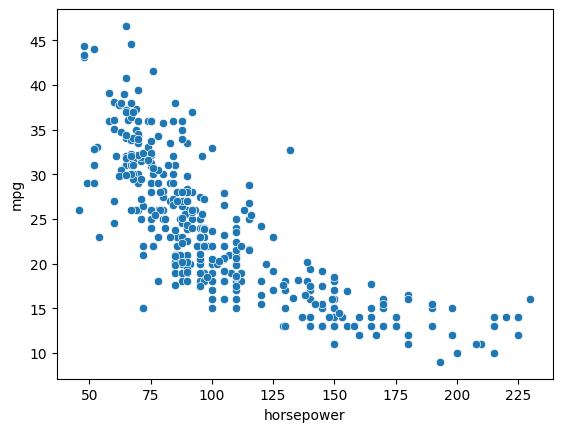

In [ ]:
# Seaborn has a built-in dataset for mpg that I can use
# The curved pattern of the data on the plot suggests a non-linear relationship.
mpg = sns.load_dataset("mpg").dropna()
sns.scatterplot(x="horsepower", y="mpg", data=mpg)

In [4]:
# Drop missing values
mpg = mpg.dropna()

# Focus on 'horsepower' and 'mpg'
X = mpg[['horsepower']].values
y = mpg['mpg'].values

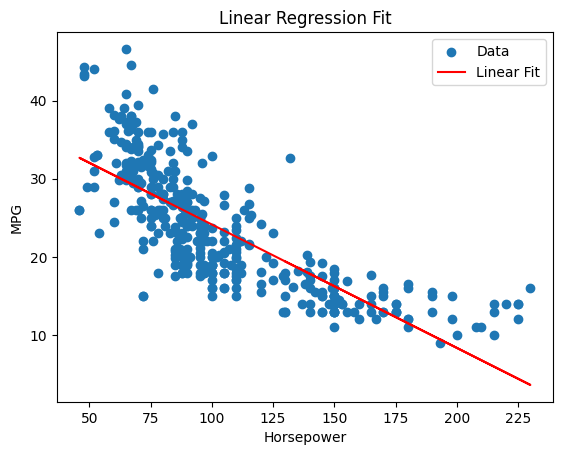

Linear R^2 Score: 0.606


In [9]:
linear_model = LinearRegression()
linear_model.fit(X, y)

y_pred_linear = linear_model.predict(X)

plt.scatter(X, y, label="Data")
plt.plot(X, y_pred_linear, color='red', label="Linear Fit")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()

print(f"Linear R^2 Score: {r2_score(y, y_pred_linear):.3f}")

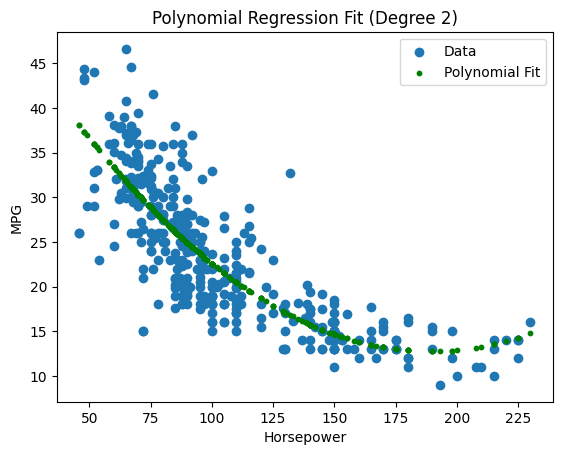

Polynomial R^2 Score: 0.688


In [8]:
# 1.a A regular linear regression model does not fit the data well
# 1.b Polynomial regression can capture the non-linear relationship
# Transform input features to polynomial terms (x, x^2)

# 2. What does it mean to create a new feature?
# Here we create a new feature, X_poly, which includes the original feature and its square
# Now my model can capture the curved relationship

# 3. What exactly was the transformation I applied to the data?
# The transformation was a Polynomial feature transformation of degree 2 on the feature horsepower

# The R^2 score for the polynomial fit should be higher than the linear fit
# 0.688 vs 0.602
# R^2 score measures the relationship between the model's predicted values
# and the actual values

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predict
y_pred_poly = poly_model.predict(X_poly)

# Plot
plt.scatter(X, y, label="Data")
plt.scatter(X, y_pred_poly, color='green', s=10, label="Polynomial Fit")
plt.legend()
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial Regression Fit (Degree 2)")
plt.show()

# Metrics
print(f"Polynomial R^2 Score: {r2_score(y, y_pred_poly):.3f}")

Reham's feedback:
* Can you explain more about the features you used and the target
* Could see the effect of using polynomial regression
* Be more careful about labels on plot before presentation so it's clearer

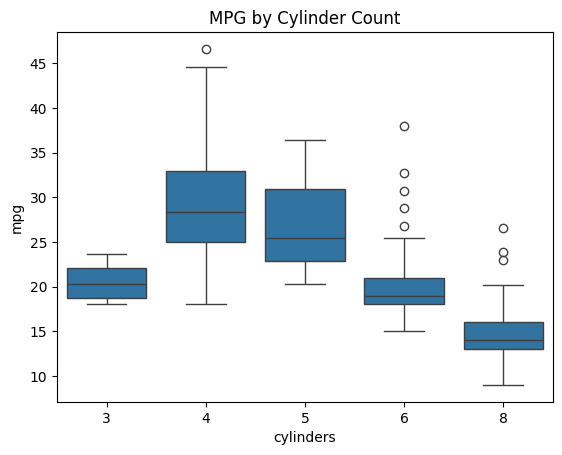

In [ ]:
# PROG8245 - Machine Learning Programming - Continuation of the analysis
# Cannot directly create a boxplot of two continuous variables like mpg vs horsepower in Seaborn 
# — because boxplots are designed to compare distributions of a numeric variable across categories
# (not between two numeric variables).
# If you'd like to examine how mpg varies with ranges of horsepower, you can bin horsepower 
# into categories and then use a boxplot.

# Generate a boxplot to demonstrate cylinder count's effect on mpg, using the 
# same dataset as before
mpg = sns.load_dataset("mpg").dropna()
cylinders = mpg['cylinders'].unique()
sns.boxplot(x='cylinders', y='mpg', data=mpg)
plt.title("MPG by Cylinder Count")
plt.show()

In [5]:
# Get five-number summary by cylinder count
mpg.groupby('cylinders')['mpg'].describe()

,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
3,4.0,20.550000,2.564501,18.0,18.75,20.25,22.05,23.7
4,199.0,29.283920,5.670546,18.0,25.00,28.40,32.95,46.6
5,3.0,27.366667,8.228204,20.3,22.85,25.40,30.90,36.4
6,83.0,19.973494,3.828809,15.0,18.00,19.00,21.00,38.0
8,103.0,14.963107,2.836284,9.0,13.00,14.00,16.00,26.6


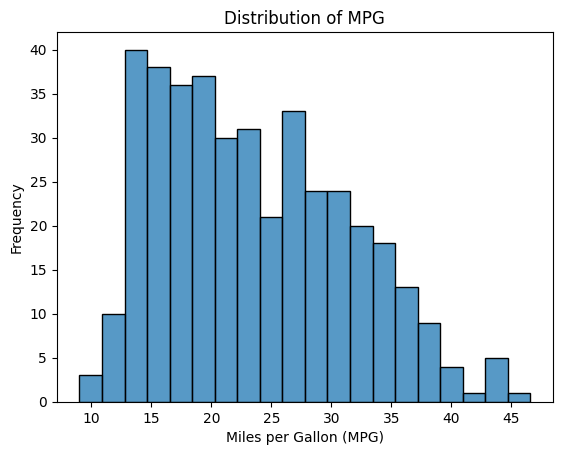

In [ ]:
# Plot a history of the mpg data in the dataset
# Load the dataset
mpg = sns.load_dataset('mpg')

# Drop missing values in mpg
mpg = mpg.dropna(subset=['mpg'])

# Create the histogram
sns.histplot(data=mpg, x='mpg', bins=20, kde=False)

# Customize labels
plt.title("Distribution of MPG")
plt.xlabel("Miles per Gallon (MPG)")
plt.ylabel("Frequency")
plt.show()

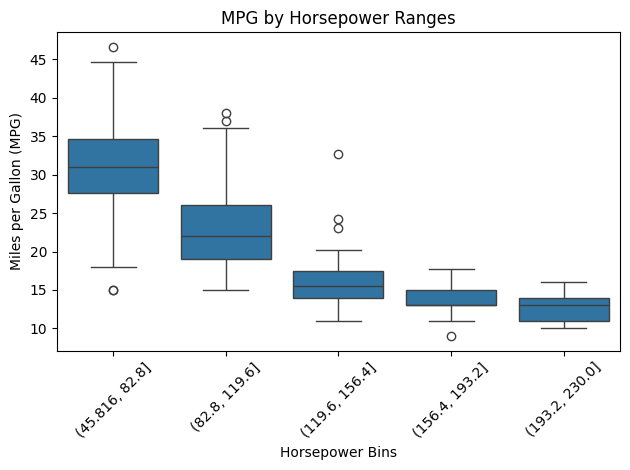

In [6]:
# To compare horsepower vs mpg, bin horsepower into categories
mpg = sns.load_dataset('mpg').dropna(subset=['mpg', 'horsepower'])

# Bin horsepower into categories
mpg['horsepower_bin'] = pd.cut(mpg['horsepower'], bins=5)

# Create boxplot
sns.boxplot(x='horsepower_bin', y='mpg', data=mpg)
plt.xticks(rotation=45)
plt.title("MPG by Horsepower Ranges")
plt.xlabel("Horsepower Bins")
plt.ylabel("Miles per Gallon (MPG)")
plt.tight_layout()
plt.show()

In [7]:
# Get five-number summary by cylinder count
mpg.groupby('horsepower_bin')['mpg'].describe()

C:\Users\Erica\AppData\Local\Temp\ipykernel_33348\42161327.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mpg.groupby('horsepower_bin')['mpg'].describe()


,count,mean,std,min,25%,50%,75%,max
horsepower_bin,,,,,,,,
"(45.816, 82.8]",122.0,31.303279,5.798032,15.0,27.55,31.0,34.65,46.6
"(82.8, 119.6]",164.0,23.021951,4.784780,15.0,19.00,22.0,26.00,38.0
"(119.6, 156.4]",66.0,16.060606,3.239510,11.0,14.00,15.5,17.50,32.7
"(156.4, 193.2]",27.0,13.711111,1.872747,9.0,13.00,13.0,15.00,17.7
"(193.2, 230.0]",13.0,12.769231,1.921538,10.0,11.00,13.0,14.00,16.0
